In [1]:
from prophet import Prophet
from prophet.make_holidays import make_holidays_df
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

# def mean_absolute_percentage_error(y_true, y_pred):
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

c:\laragon\www\ProjectSkripsi\project-prediksi\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_excel("../data/data_kiriman.xlsx")
df.describe()

,SLA,Kantor_Kirim,Tgl_Kirim,Tgl_Antaran_Pertama,Tgl_Update,Berat,Cek
count,965003.000000,965003.000000,965003,965003,965003,965003.000000,965003.0
mean,2.281931,50826.053391,2023-02-25 02:27:21.960491008,2023-02-27 02:38:10.271844352,2023-02-27 03:56:00.154941440,0.569269,1.0
min,2.000000,10000.000000,2020-12-26 00:00:00,2021-01-01 00:00:00,2021-01-01 00:00:00,0.010000,1.0
25%,2.000000,40000.000000,2022-04-03 00:00:00,2022-04-05 00:00:00,2022-04-05 00:00:00,0.020000,1.0
50%,2.000000,61300.000000,2023-02-27 00:00:00,2023-02-28 00:00:00,2023-02-28 00:00:00,0.100000,1.0
75%,2.000000,65100.000000,2024-03-01 00:00:00,2024-03-03 00:00:00,2024-03-03 00:00:00,0.980000,1.0
max,6.000000,99900.000000,2024-12-29 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,10.000000,1.0
std,0.651119,22275.113908,NaN,NaN,NaN,1.061399,0.0


In [3]:
# display(df)
df.head(10)
# df.tail()

,Nosi,Posisi_Saat_Ini,Status Kiriman,Produk,SLA,Kantor_Kirim,Tgl_Kirim,Tgl_Antaran_Pertama,Tgl_Update,Petugas,Nama_Penerima,Alamat,Kota,Alasan_Gagal,Alasan_Irregulitas,Status_SWP,Berat,Cek
0,P2410070150487,KCU MALANG 65100,DELIVERED,PKH,5,75500,2021-10-07,2021-10-13,2021-10-13,Moch. Nur Haqiqi,ARYA SYAHREZA -25/PDT.G/2024,JL BANDUNG RT 01,"KOTA MALANG, KLOJEN",-,Tanpa Manifest,oversla,0.1,1
1,P2410070150380,KCU MALANG 65100,DELIVERED,PKH,5,75500,2022-10-07,2022-10-13,2022-10-13,Moch. Nur Haqiqi,ARYA SYAHREZA -25/PDT.BTH,JL BANDUNG RT 01,"KOTA MALANG, KLOJEN",-,Tanpa Manifest,oversla,0.1,1
2,P2410070151187,KCU MALANG 65100,DELIVERED,PKH,5,75500,2022-10-07,2022-10-13,2022-10-13,Moch. Nur Haqiqi,ARYA SJAHREZA -25/PDT.G/2024,JL BANDUNG 34 RT 01 DESA PENGANGGUNGAN,"KOTA MALANG, KLOJEN",-,Tanpa Manifest,oversla,0.1,1
3,P2410070150487,KCU MALANG 65100,DELIVERED,PKH,5,75500,2022-10-07,2022-10-13,2022-10-13,Moch. Nur Haqiqi,ARYA SYAHREZA -25/PDT.G/2024,JL BANDUNG RT 01,"KOTA MALANG, KLOJEN",-,Tanpa Manifest,oversla,0.1,1
4,P2410070150487,KCU MALANG 65100,DELIVERED,PKH,5,75500,2023-10-07,2023-10-13,2023-10-13,Moch. Nur Haqiqi,ARYA SYAHREZA -25/PDT.G/2024,JL BANDUNG RT 01,"KOTA MALANG, KLOJEN",-,Tanpa Manifest,oversla,0.1,1
5,P2410070150380,KCU MALANG 65100,DELIVERED,PKH,5,75500,2023-10-07,2023-10-13,2023-10-13,Moch. Nur Haqiqi,ARYA SYAHREZA -25/PDT.BTH,JL BANDUNG RT 01,"KOTA MALANG, KLOJEN",-,Tanpa Manifest,oversla,0.1,1
6,P2410070151187,KCU MALANG 65100,DELIVERED,PKH,5,75500,2023-10-07,2023-10-13,2023-10-13,Moch. Nur Haqiqi,ARYA SJAHREZA -25/PDT.G/2024,JL BANDUNG 34 RT 01 DESA PENGANGGUNGAN,"KOTA MALANG, KLOJEN",-,Tanpa Manifest,oversla,0.1,1
7,P2410070150380,KCU MALANG 65100,DELIVERED,PKH,5,75500,2024-10-07,2024-10-13,2024-10-13,Moch. Nur Haqiqi,ARYA SYAHREZA -25/PDT.BTH,JL BANDUNG RT 01,"KOTA MALANG, KLOJEN",-,Tanpa Manifest,oversla,0.1,1
8,P2410070150487,KCU MALANG 65100,DELIVERED,PKH,5,75500,2024-10-07,2024-10-13,2024-10-13,Moch. Nur Haqiqi,ARYA SYAHREZA -25/PDT.G/2024,JL BANDUNG RT 01,"KOTA MALANG, KLOJEN",-,Tanpa Manifest,oversla,0.1,1
9,P2410070151187,KCU MALANG 65100,DELIVERED,PKH,5,75500,2024-10-07,2024-10-13,2024-10-13,Moch. Nur Haqiqi,ARYA SJAHREZA -25/PDT.G/2024,JL BANDUNG 34 RT 01 DESA PENGANGGUNGAN,"KOTA MALANG, KLOJEN",-,Tanpa Manifest,oversla,0.1,1


In [4]:
df = df[['Kota', 'Cek', 'Tgl_Kirim']]
# display(df)
df.head(10)

,Kota,Cek,Tgl_Kirim
0,"KOTA MALANG, KLOJEN",1,2021-10-07
1,"KOTA MALANG, KLOJEN",1,2022-10-07
2,"KOTA MALANG, KLOJEN",1,2022-10-07
3,"KOTA MALANG, KLOJEN",1,2022-10-07
4,"KOTA MALANG, KLOJEN",1,2023-10-07
5,"KOTA MALANG, KLOJEN",1,2023-10-07
6,"KOTA MALANG, KLOJEN",1,2023-10-07
7,"KOTA MALANG, KLOJEN",1,2024-10-07
8,"KOTA MALANG, KLOJEN",1,2024-10-07
9,"KOTA MALANG, KLOJEN",1,2024-10-07


In [5]:
df['Kecamatan'] = df['Kota'].apply(lambda x: x.split(',')[1].strip() if len(x.split(',')) > 1 else '')
display(df)

,Kota,Cek,Tgl_Kirim,Kecamatan
0,"KOTA MALANG, KLOJEN",1,2021-10-07,KLOJEN
1,"KOTA MALANG, KLOJEN",1,2022-10-07,KLOJEN
2,"KOTA MALANG, KLOJEN",1,2022-10-07,KLOJEN
3,"KOTA MALANG, KLOJEN",1,2022-10-07,KLOJEN
4,"KOTA MALANG, KLOJEN",1,2023-10-07,KLOJEN
...,...,...,...,...
964998,"KOTA MALANG, LOWOKWARU",1,2024-12-01,LOWOKWARU
964999,"KOTA MALANG, BLIMBING",1,2024-12-01,BLIMBING
965000,"KOTA MALANG, KEDUNGKANDANG",1,2024-12-01,KEDUNGKANDANG
965001,"KOTA MALANG, KLOJEN",1,2024-12-01,KLOJEN


In [6]:
df = df[['Kecamatan', 'Cek', 'Tgl_Kirim']]
display(df)

,Kecamatan,Cek,Tgl_Kirim
0,KLOJEN,1,2021-10-07
1,KLOJEN,1,2022-10-07
2,KLOJEN,1,2022-10-07
3,KLOJEN,1,2022-10-07
4,KLOJEN,1,2023-10-07
...,...,...,...
964998,LOWOKWARU,1,2024-12-01
964999,BLIMBING,1,2024-12-01
965000,KEDUNGKANDANG,1,2024-12-01
965001,KLOJEN,1,2024-12-01


In [7]:
df_kecamatan_weekly = df.groupby('Kecamatan').resample('W', on='Tgl_Kirim')['Cek'].count().reset_index()
df_kecamatan_weekly.rename(columns={'Cek': 'total paket'}, inplace=True)
display(df_kecamatan_weekly)

,Kecamatan,Tgl_Kirim,total paket
0,BLIMBING,2020-12-27,7
1,BLIMBING,2021-01-03,217
2,BLIMBING,2021-01-10,518
3,BLIMBING,2021-01-17,432
4,BLIMBING,2021-01-24,446
...,...,...,...
1045,SUKUN,2024-12-01,584
1046,SUKUN,2024-12-08,764
1047,SUKUN,2024-12-15,798
1048,SUKUN,2024-12-22,804


In [8]:
df_kecamatan_weekly['minggu_ke'] = df_kecamatan_weekly['Tgl_Kirim'].dt.isocalendar().week.astype(int)
display(df_kecamatan_weekly)

,Kecamatan,Tgl_Kirim,total paket,minggu_ke
0,BLIMBING,2020-12-27,7,52
1,BLIMBING,2021-01-03,217,53
2,BLIMBING,2021-01-10,518,1
3,BLIMBING,2021-01-17,432,2
4,BLIMBING,2021-01-24,446,3
...,...,...,...,...
1045,SUKUN,2024-12-01,584,48
1046,SUKUN,2024-12-08,764,49
1047,SUKUN,2024-12-15,798,50
1048,SUKUN,2024-12-22,804,51


In [9]:
output_path = '../data/df_kecamatan_weekly.xlsx'
df_kecamatan_weekly.to_excel(output_path, index=False)
print(f"DataFrame 'df_kecamatan_weekly' berhasil di simpan di {output_path}")

DataFrame 'df_kecamatan_weekly' berhasil di simpan di ../data/df_kecamatan_weekly.xlsx


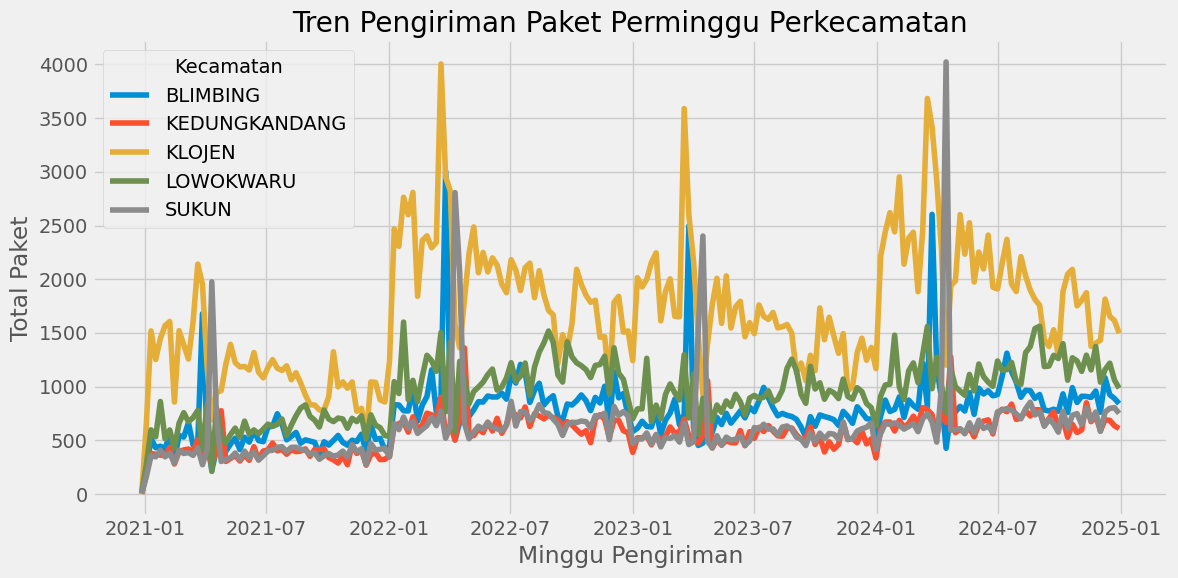

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_kecamatan_weekly, x='Tgl_Kirim', y='total paket', hue='Kecamatan')
plt.title('Tren Pengiriman Paket Perminggu Perkecamatan')
plt.xlabel('Minggu Pengiriman')
plt.ylabel('Total Paket')
plt.legend(title='Kecamatan')
plt.grid(True)
plt.tight_layout()
plt.show()

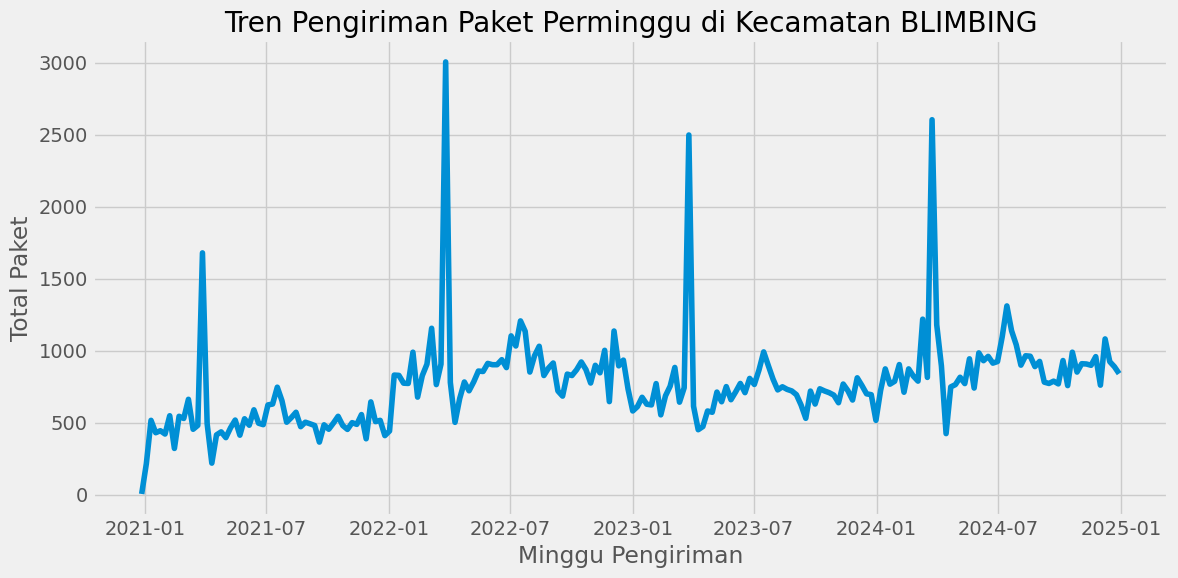

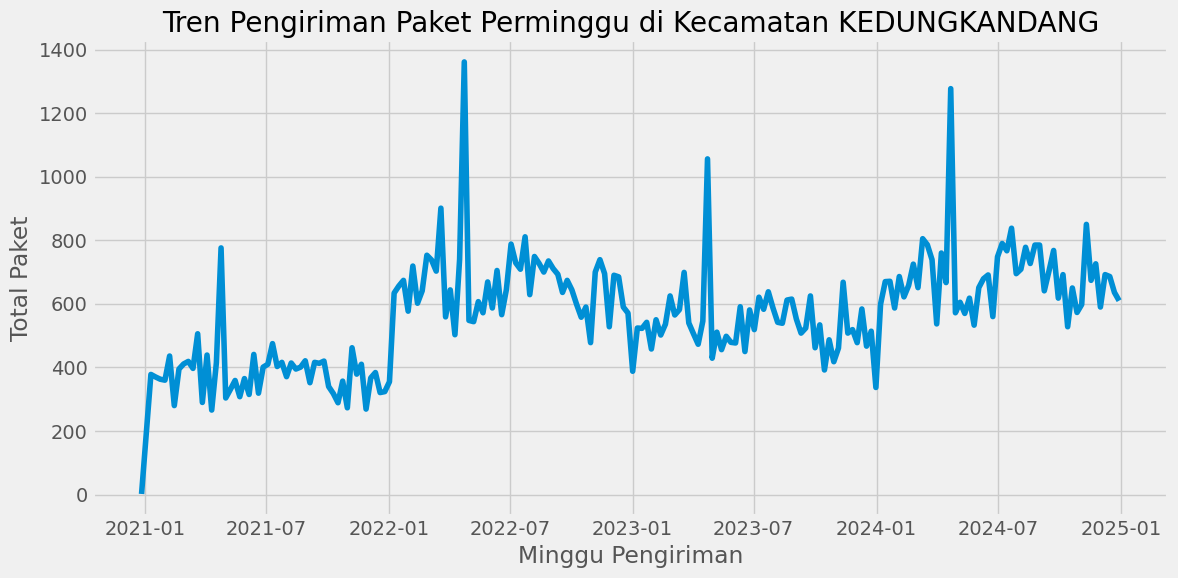

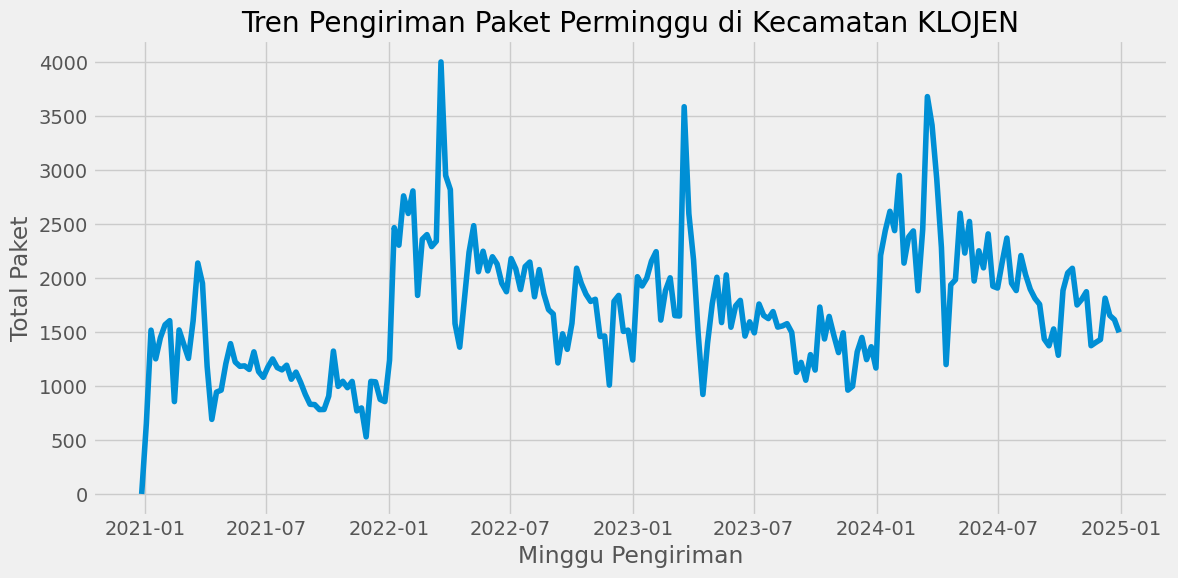

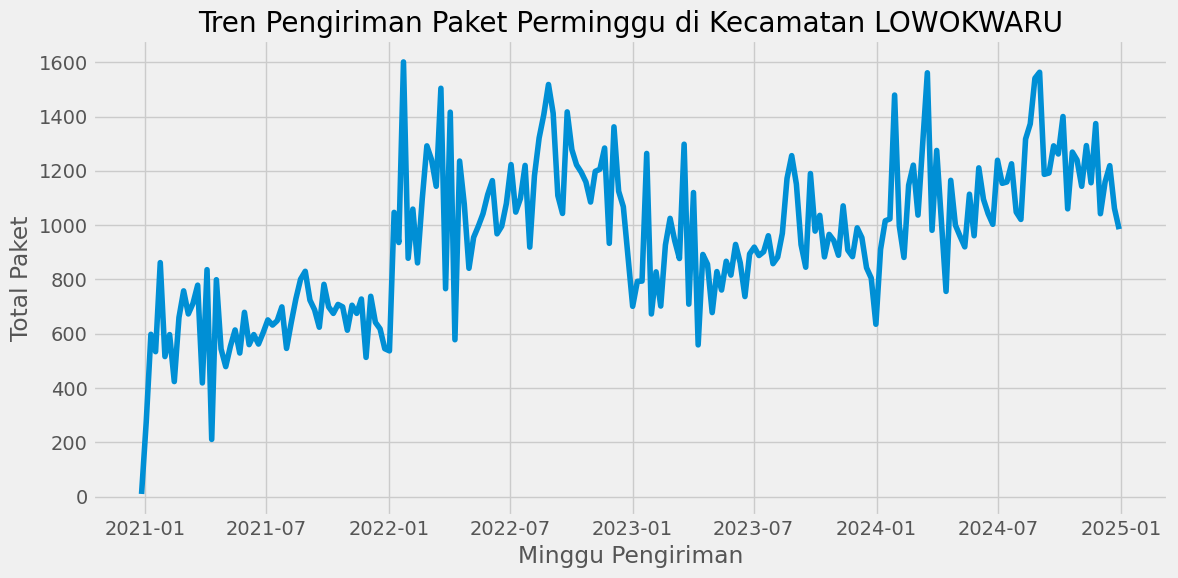

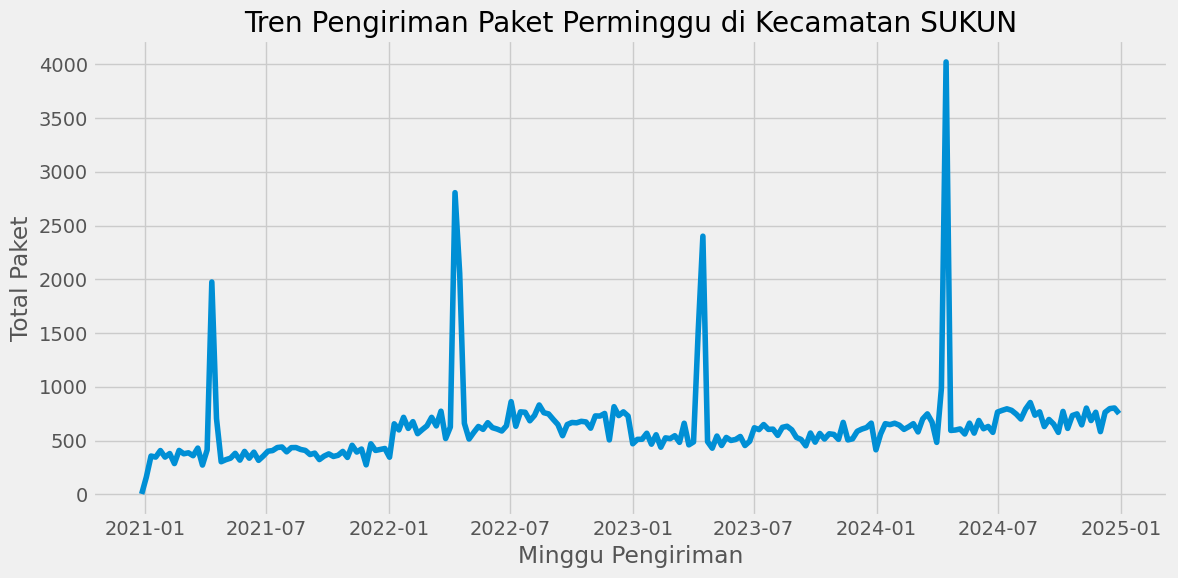

In [12]:
unique_kecamatan = df_kecamatan_weekly['Kecamatan'].unique()

for kecamatan in unique_kecamatan:
    df_filtered = df_kecamatan_weekly[df_kecamatan_weekly['Kecamatan'] == kecamatan]

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_filtered, x='Tgl_Kirim', y='total paket')
    plt.title(f'Tren Pengiriman Paket Perminggu di Kecamatan {kecamatan}')
    plt.xlabel('Minggu Pengiriman')
    plt.ylabel('Total Paket')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

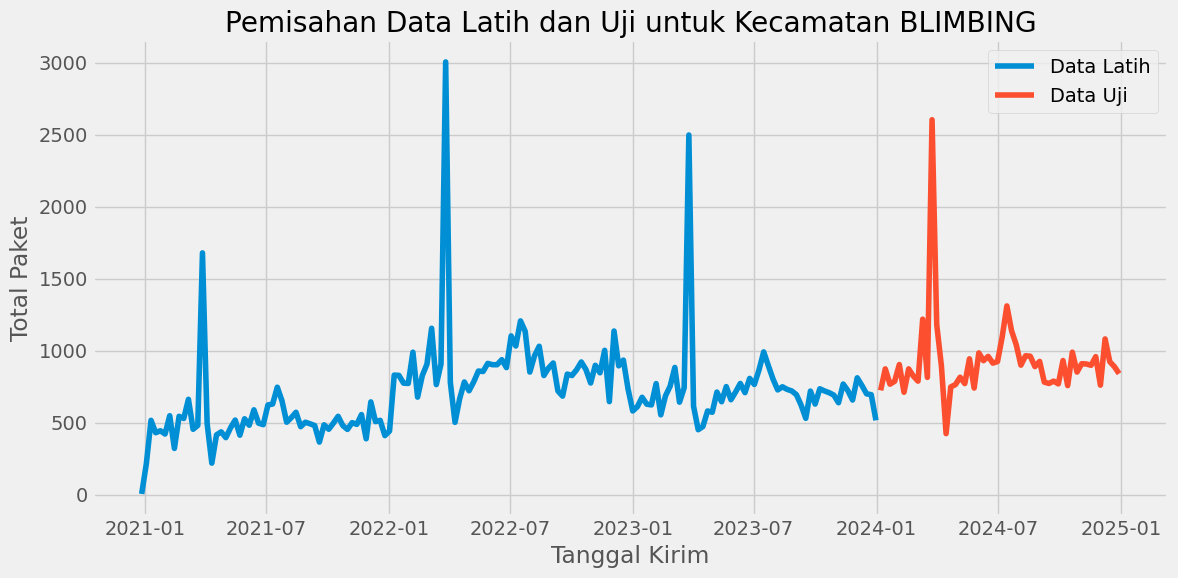

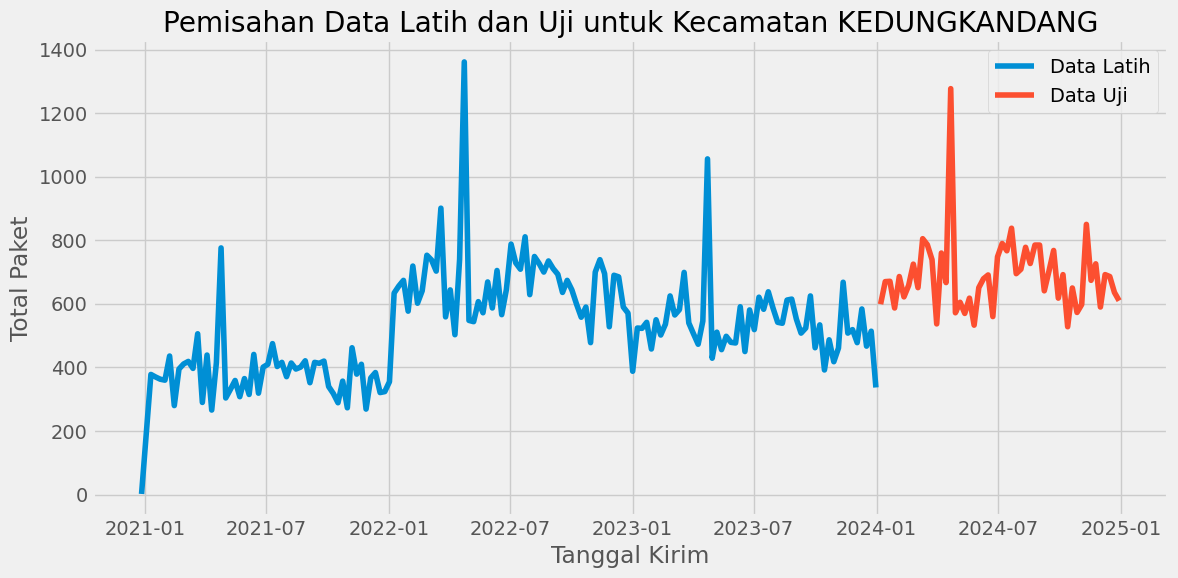

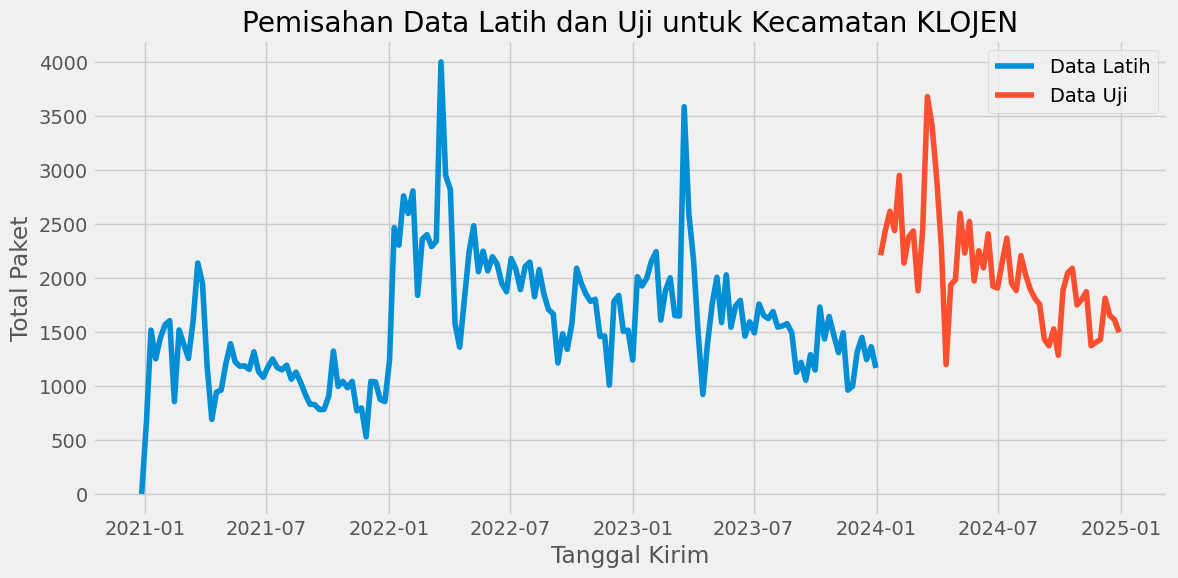

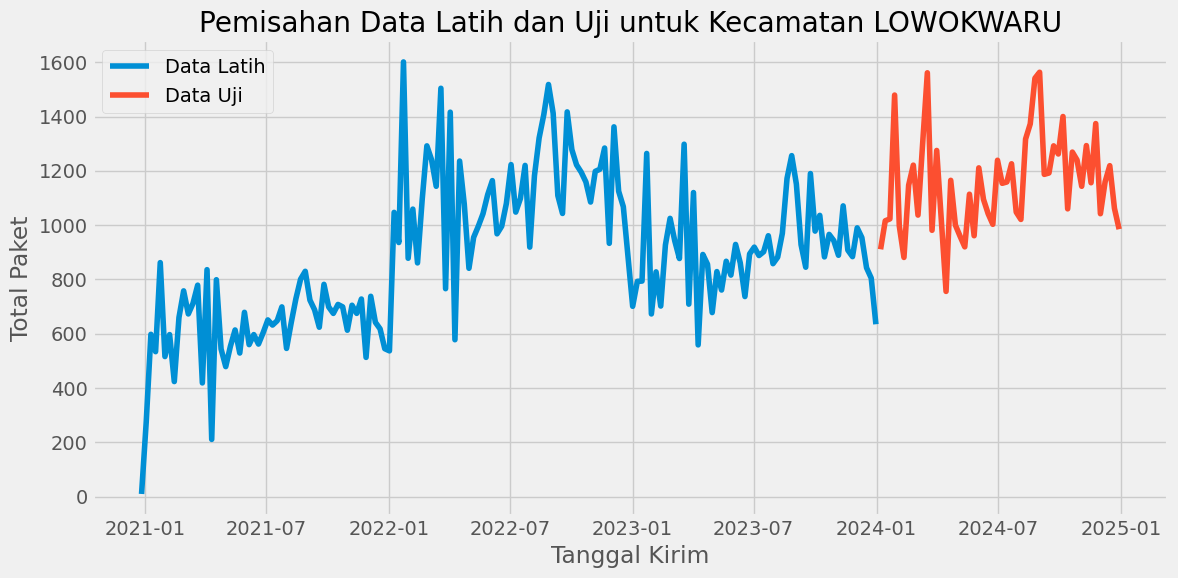

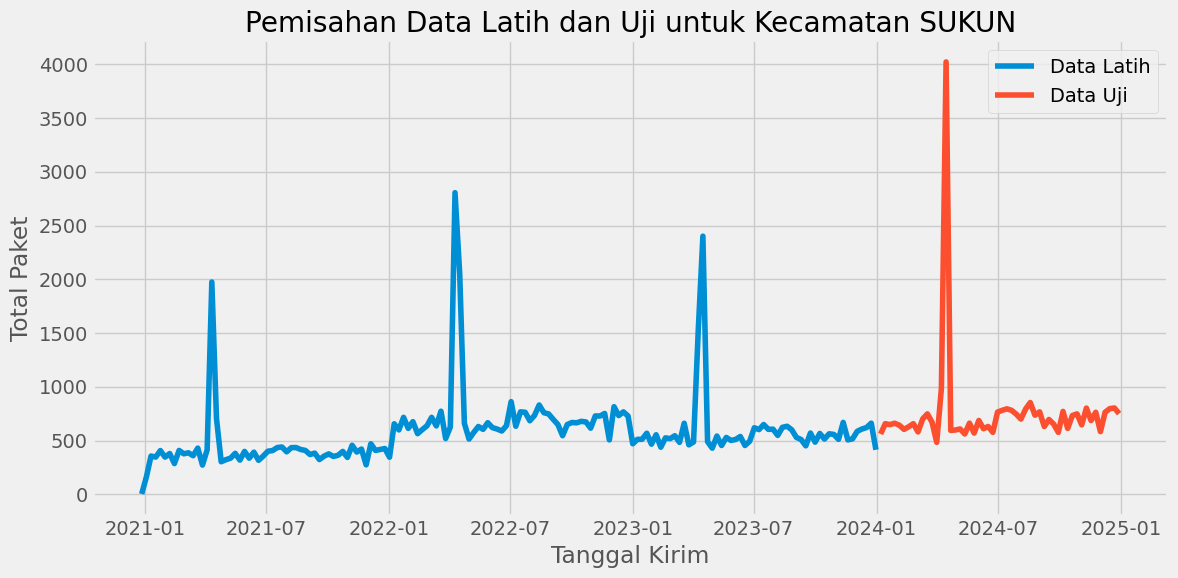

In [13]:
unique_kecamatan = df_kecamatan_weekly['Kecamatan'].unique()

for kecamatan in unique_kecamatan:
    # Filter data untuk kecamatan saat ini
    df_filtered_kecamatan = df_kecamatan_weekly[df_kecamatan_weekly['Kecamatan'] == kecamatan]

    # Hitung titik pemisahan untuk kecamatan saat ini (52 minggu terakhir untuk data test)
    split_point_kecamatan = len(df_filtered_kecamatan) - 52

    # Pisahkan data menjadi train dan test untuk kecamatan saat ini
    train_kecamatan = df_filtered_kecamatan.iloc[:split_point_kecamatan]
    test_kecamatan = df_filtered_kecamatan.iloc[split_point_kecamatan:]

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=train_kecamatan, x='Tgl_Kirim', y='total paket', label='Data Latih')
    sns.lineplot(data=test_kecamatan, x='Tgl_Kirim', y='total paket', label='Data Uji')
    plt.title(f'Pemisahan Data Latih dan Uji untuk Kecamatan {kecamatan}')
    plt.xlabel('Tanggal Kirim')
    plt.ylabel('Total Paket')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

,ds,holiday
0,2024-01-01,New Year's Day
1,2024-08-17,Independence Day
2,2024-12-25,Christmas Day
3,2024-04-10,Eid al-Fitr
4,2024-04-11,Eid al-Fitr Second Day


,ds,holiday
62,2023-03-22,Day of Silence
63,2023-06-04,Vesak Day
64,2023-01-22,Lunar New Year
65,2023-05-01,International Labor Day
66,2023-06-01,Pancasila Day



=== Prediksi Prophet + Libur Nasional (Train 2021-2023, Test 2024) untuk Kecamatan BLIMBING ===


17:13:25 - cmdstanpy - INFO - Chain [1] start processing
17:13:28 - cmdstanpy - INFO - Chain [1] done processing
17:13:28 - cmdstanpy - INFO - Chain [1] done processing


MSE : 201507.00
MAE : 394.22
MAPE : 41.37%
RMSE : 448.90


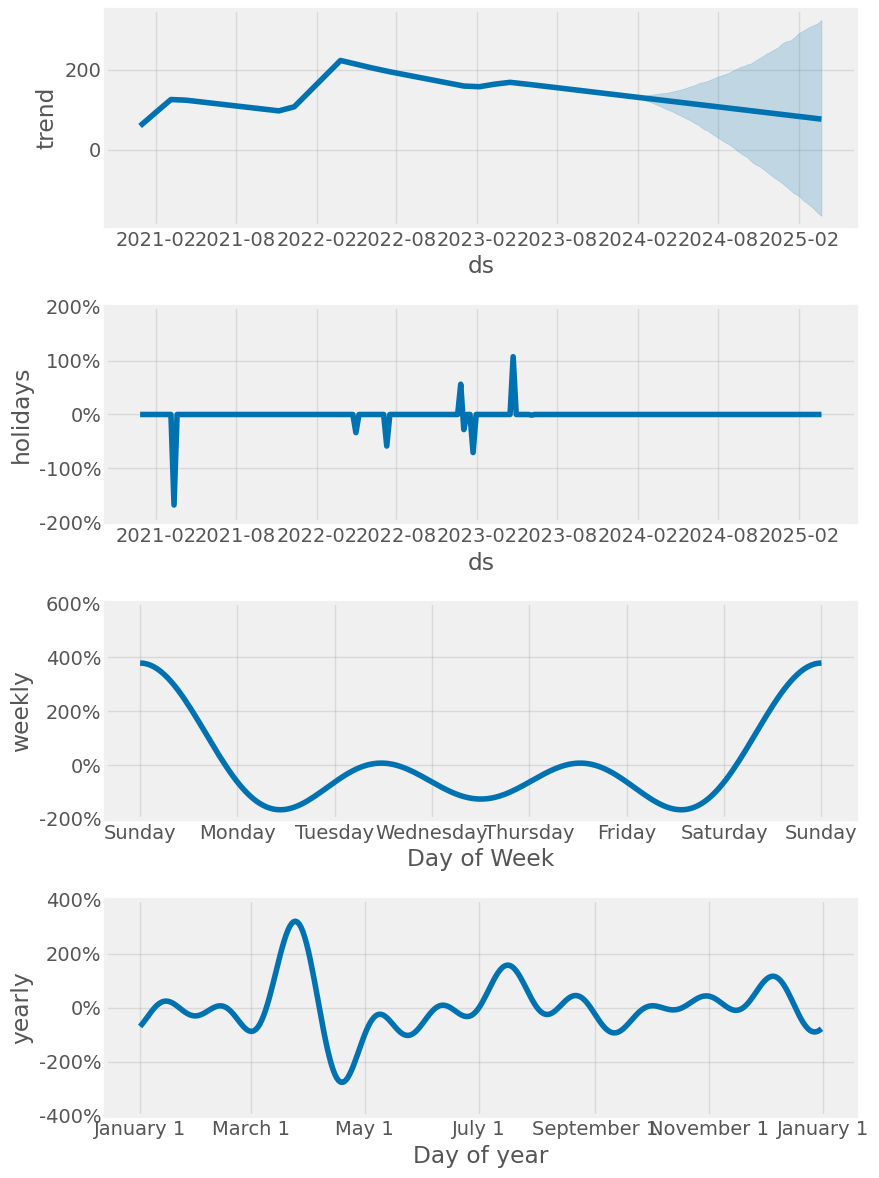

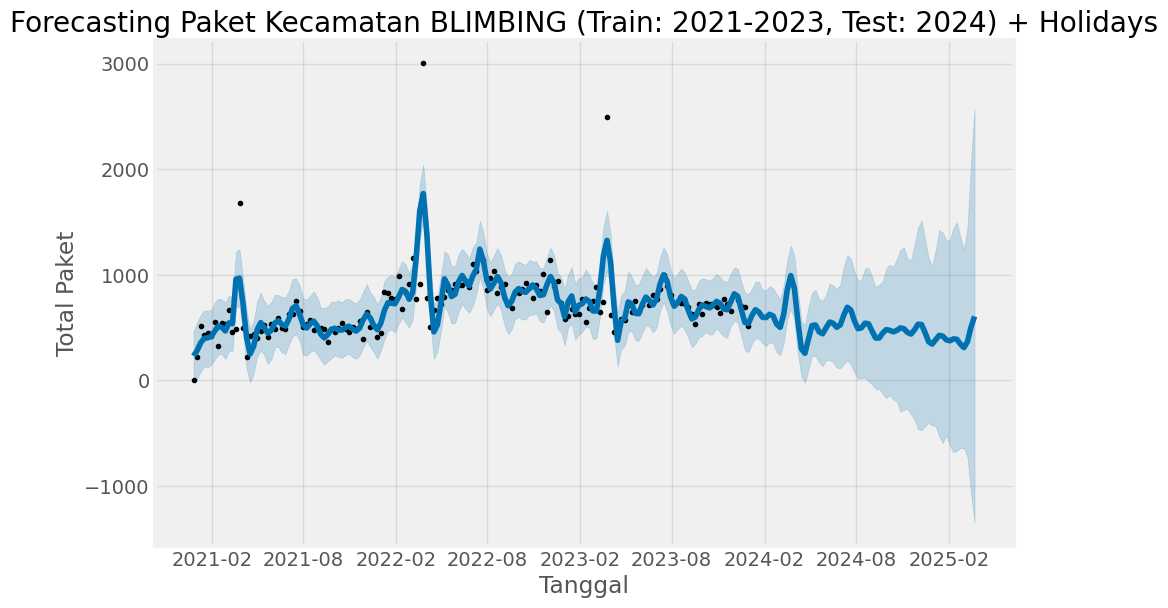


=== Prediksi Prophet + Libur Nasional (Train 2021-2023, Test 2024) untuk Kecamatan KEDUNGKANDANG ===


17:13:30 - cmdstanpy - INFO - Chain [1] start processing
17:13:31 - cmdstanpy - INFO - Chain [1] done processing
17:13:31 - cmdstanpy - INFO - Chain [1] done processing


MSE : 413561.72
MAE : 613.03
MAPE : 88.94%
RMSE : 643.09


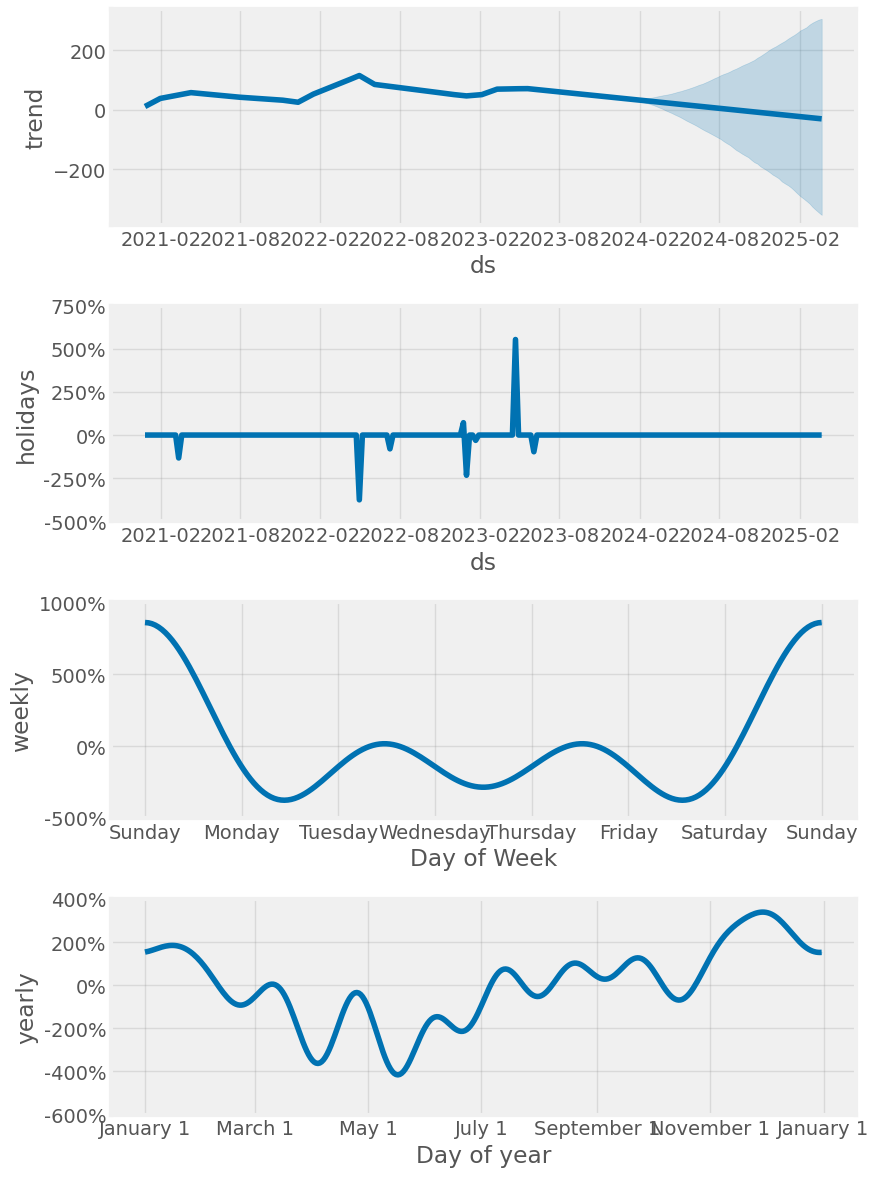

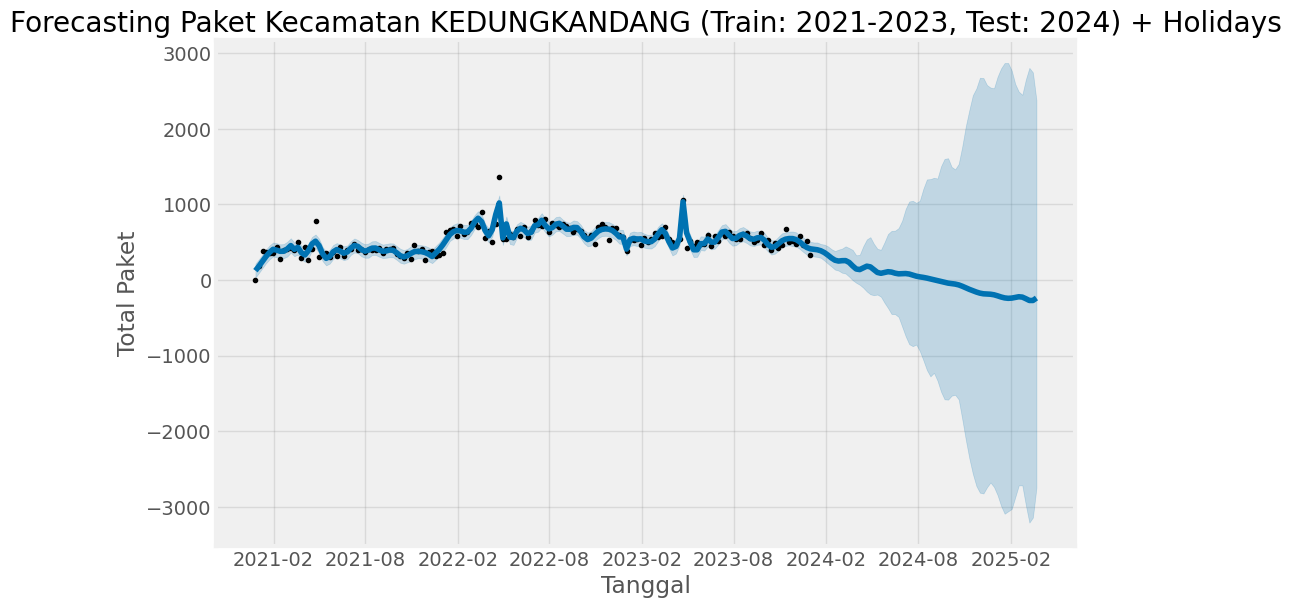


=== Prediksi Prophet + Libur Nasional (Train 2021-2023, Test 2024) untuk Kecamatan KLOJEN ===


17:13:33 - cmdstanpy - INFO - Chain [1] start processing
17:13:33 - cmdstanpy - INFO - Chain [1] done processing
17:13:33 - cmdstanpy - INFO - Chain [1] done processing


MSE : 689568.85
MAE : 792.46
MAPE : 38.29%
RMSE : 830.40


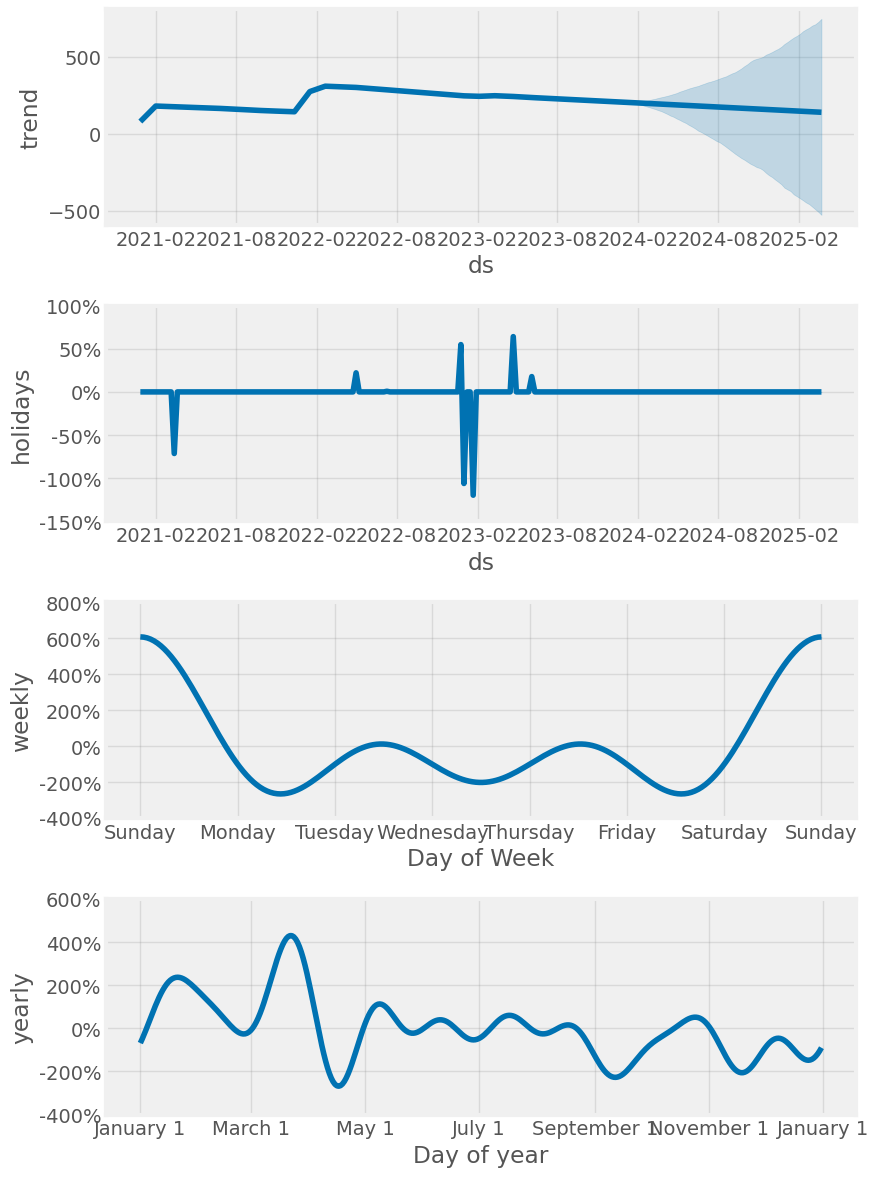

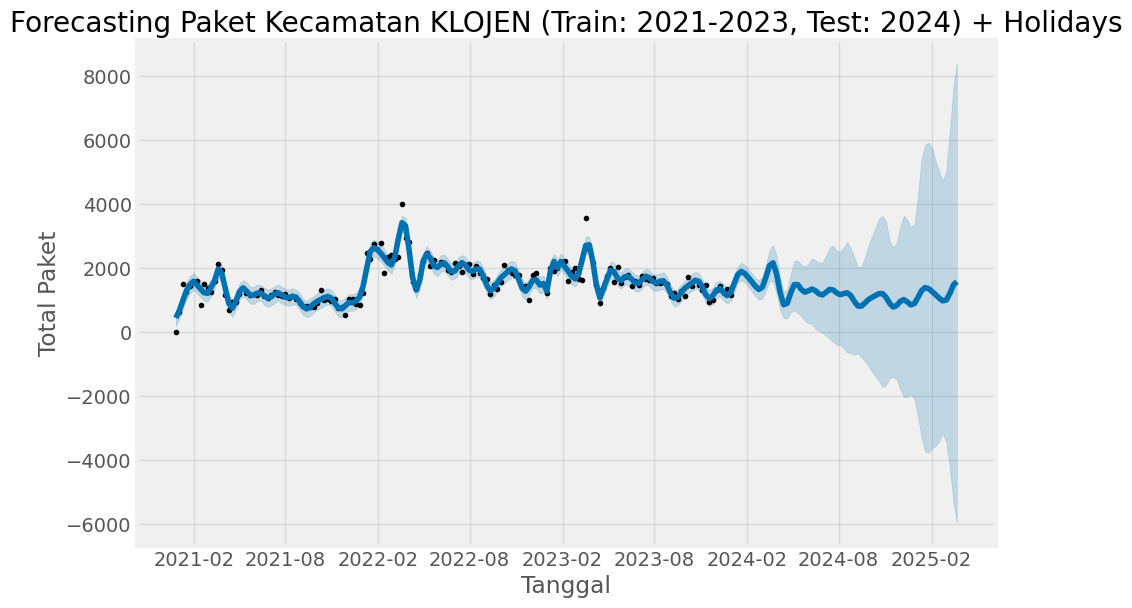


=== Prediksi Prophet + Libur Nasional (Train 2021-2023, Test 2024) untuk Kecamatan LOWOKWARU ===


17:13:35 - cmdstanpy - INFO - Chain [1] start processing
17:13:35 - cmdstanpy - INFO - Chain [1] done processing
17:13:35 - cmdstanpy - INFO - Chain [1] done processing


MSE : 63109.32
MAE : 221.78
MAPE : 18.55%
RMSE : 251.22


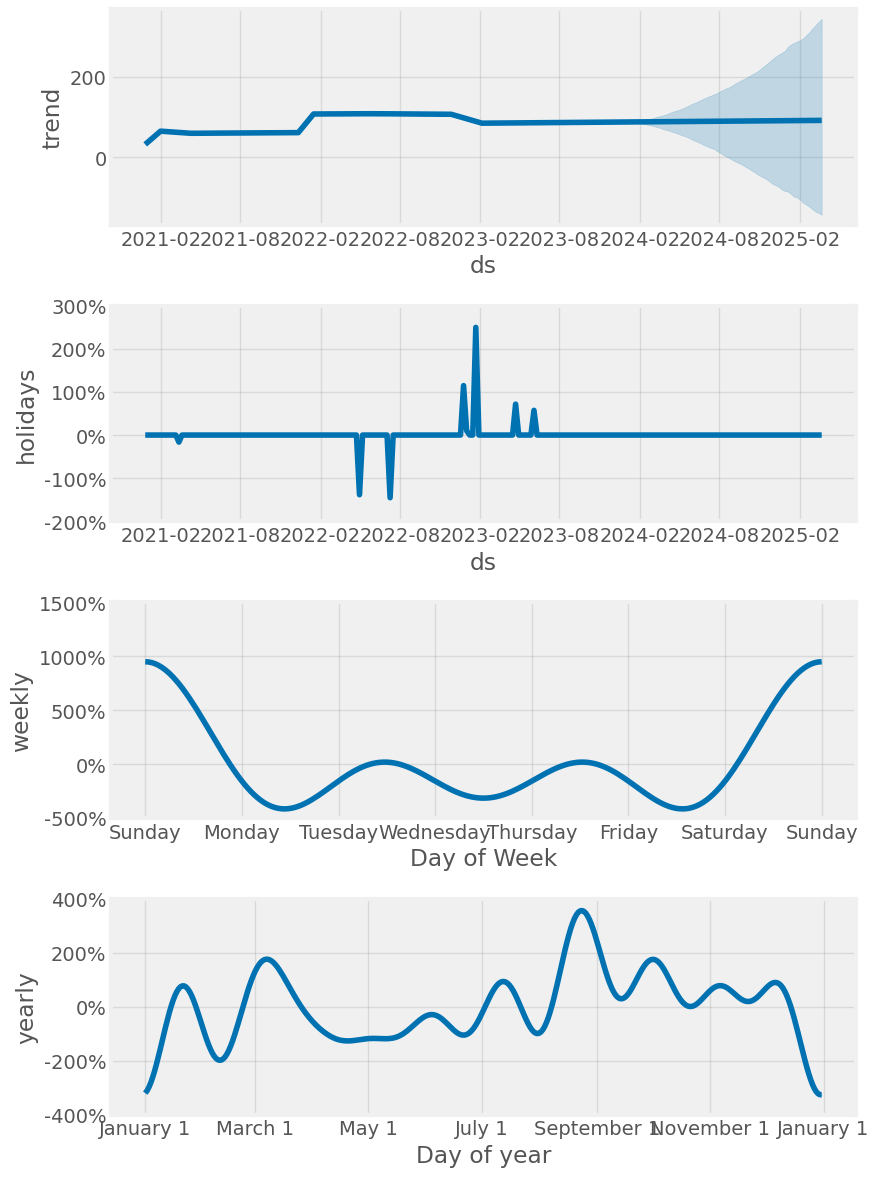

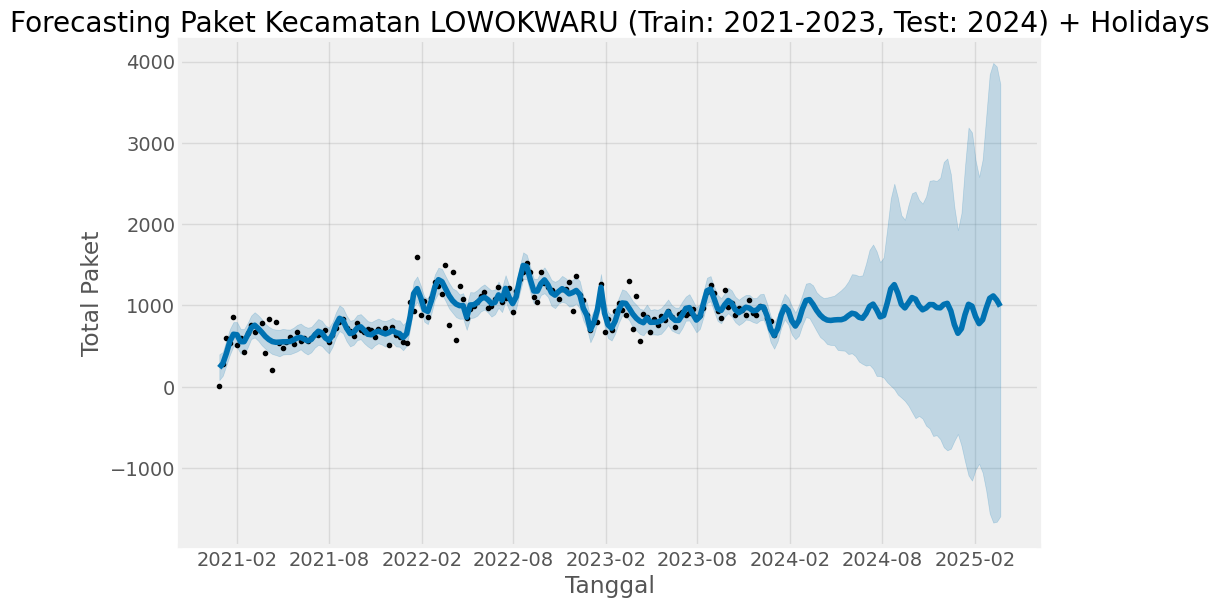


=== Prediksi Prophet + Libur Nasional (Train 2021-2023, Test 2024) untuk Kecamatan SUKUN ===


17:13:37 - cmdstanpy - INFO - Chain [1] start processing
17:13:38 - cmdstanpy - INFO - Chain [1] done processing
17:13:38 - cmdstanpy - INFO - Chain [1] done processing


MSE : 679127.31
MAE : 662.02
MAPE : 86.13%
RMSE : 824.09


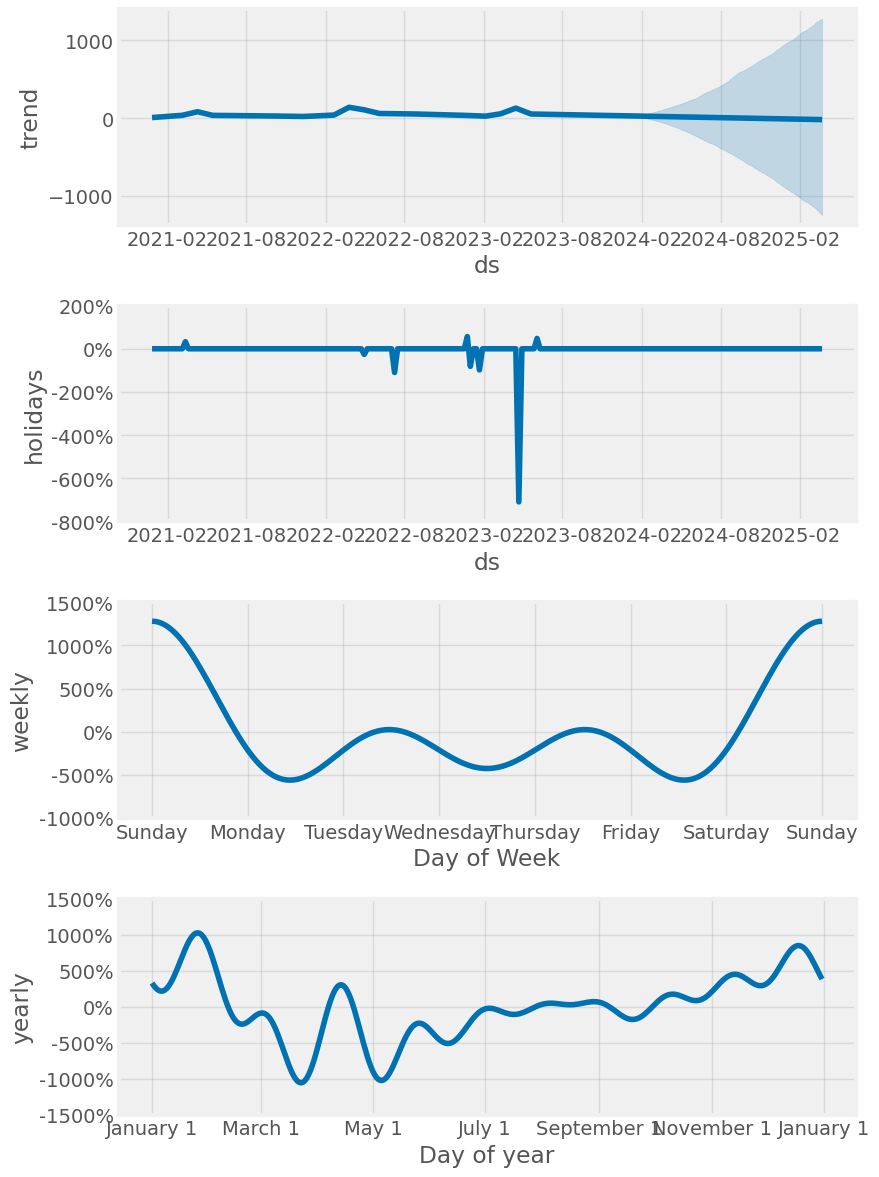

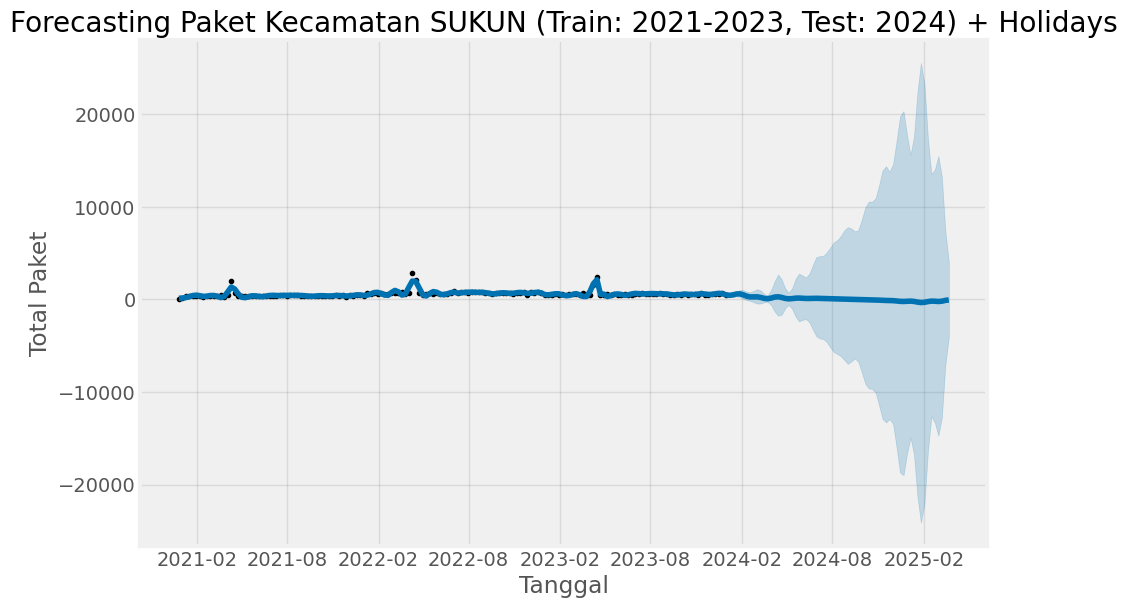

,MSE,MAE,MAPE,RMSE
BLIMBING,201506.996672,394.219119,41.368185,448.895307
KEDUNGKANDANG,413561.723024,613.027279,88.941961,643.087648
KLOJEN,689568.853626,792.457263,38.289006,830.402826
LOWOKWARU,63109.316947,221.781363,18.549308,251.215678
SUKUN,679127.308817,662.016764,86.128874,824.091808


In [14]:
from prophet import Prophet
from prophet.make_holidays import make_holidays_df
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Holiday otomatis Indonesia
holidays = make_holidays_df(
    year_list=[2021, 2022, 2023, 2024],
    country='ID'
)

display(holidays.head())
display(holidays.tail())

unique_kecamatan = df_kecamatan_weekly['Kecamatan'].unique()

predictions_results = {}
evaluation_metrics = {}

for kecamatan in unique_kecamatan:
    print(f"\n=== Prediksi Prophet + Libur Nasional (Train 2021-2023, Test 2024) untuk Kecamatan {kecamatan} ===")

    df_filtered_kecamatan = df_kecamatan_weekly[df_kecamatan_weekly['Kecamatan'] == kecamatan].copy()

    # Split berdasarkan tahun
    train = df_filtered_kecamatan[df_filtered_kecamatan['Tgl_Kirim'].dt.year < 2024].copy()
    test = df_filtered_kecamatan[df_filtered_kecamatan['Tgl_Kirim'].dt.year == 2024].copy()

    train_prophet = train[['Tgl_Kirim', 'total paket']].copy()
    train_prophet.columns = ['ds', 'y']

    # Model Prophet
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False,
        seasonality_mode='multiplicative',
        changepoint_prior_scale=0.8,
        holidays=holidays
    )

    model.fit(train_prophet)

    # Future dataframe = banyak minggu di test + 12 minggu forecast ke depan
    future = model.make_future_dataframe(periods=len(test) + 12, freq='W')
    forecast = model.predict(future)

    # Ambil prediksi hanya untuk periode test 2024
    test_predictions = forecast.tail(len(test) + 12).head(len(test))

    # Calculate evaluation metrics
    y_true = test['total paket'].values
    y_pred = test_predictions['yhat'].values

    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    rmse = np.sqrt(mse)

    predictions_results[kecamatan] = {
        'train': train,
        'test': test,
        'forecast': forecast,
        'test_predictions': test_predictions,
        'future_predictions': forecast.tail(12)
    }

    evaluation_metrics[kecamatan] = {
        'MSE': mse,
        'MAE': mae,
        'MAPE': mape,
        'RMSE': rmse
    }

    print(f"MSE : {mse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2f}%")
    print(f"RMSE : {rmse:.2f}")

    model.plot_components(forecast)
    plt.show()

    model.plot(forecast)
    plt.title(f"Forecasting Paket Kecamatan {kecamatan} (Train: 2021-2023, Test: 2024) + Holidays")
    plt.xlabel("Tanggal")
    plt.ylabel("Total Paket")
    plt.show()

pd.DataFrame(evaluation_metrics).T
